In [4]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Analytical Distributions

We can use analytical distributions to help us learn from our data, and to build towards using our data as a tool. 

Here we can start by using an analytical distribution to build a model that will help us to predict the daily investment return on the stock price of Microsoft. 


In [5]:
#Load data, loose the excess
df = pd.read_csv('data/MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


#### Data Preparation

We need to change the original data into the daily return. This code uses the diff() function to calculate the difference in price from yesterday to today. This daily gain/loss is then divided by the closing price to produce the daily percentage return, which is what we will look at. 

In [6]:
#Do a little manipulation to get the return
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff']/df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:

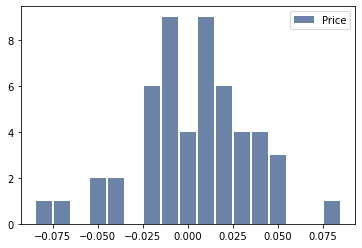

In [7]:
#Histogram
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
thinkplot.Config()

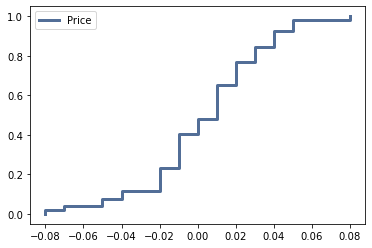

In [8]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

### Check for Normality

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 

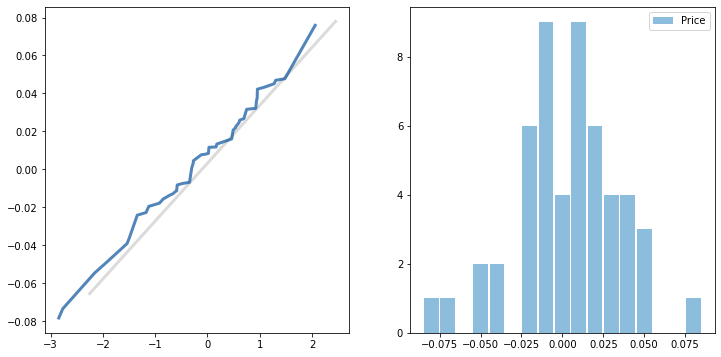

In [9]:
#Create probability plot
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(df["return"])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
thinkplot.Config()

#### Normality Check

The normal probability plot is constructed is a somewhat complex way, that we don't really care about, the interpretation is relatively simple though. 
<ul>
<li> The normal probability plot compares theoretical (i.e. a real normal distribution) values (in Z scores) on the x-axis, vs real quantities on the y-axis. 
<li> The straight reference line is a real normal distributions. 
<li> The dots/other line is our data. 
<li> <b> We read the graph by comparing the blue line to the grey line:</b>
    <ul>
    <li> If the blue line is overlapping the grey, that shows us that at that point on the x-axis (distance from mean), that the real data "matches" what we expect from a normal distribution. 
    <li> If the blue line is lower than the grey, that shows that at that point on the x-axis, the real data is lower than we'd expect if the distribution was perfectly normal. 
    <li> If the blue line is higher than the grey, that shows that at that point on the x-axis, the real data is higher than we'd expect if the distribution was perfectly normal. 
    </ul>
</ul>

<b>So a perfectly normal distribution will lie right on top of the grey line. The more separation from the grey, the "less normal" our data is.</b>

Does this one match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 

### The Power of Being Normal

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 

The fact that the data in our emperical sample will follow (we hope) that normal distribution pattern, we can apply all of the general knowledge of normal distributions to our situation - the knowledge that X% will fall within certain standard deviation ranges, the ability to infer percentiles, etc... This works even if we don't have a massive sample of data that would allow us to generate those distribution patterns from scratch. 

While everything in the world isn't normal, many things are, and that knowledge helps us substantially. We can safely assume things such as blood pressure are normally distributed, so if you are able to take a small sample of blood pressure from the population you're looking at, calculate the mean, count, and variance, and create an analytical distribution that you can generalize from confidently. 

#### The Predictive Power of Analytical Distributions

One of the things that our analytical distribution relationship allows us to do is to have a pattern from which to make predictions from. For example, if we find that our daily return data:
<ul>
<li> Is normally distributed. 
<li> Has a mean and a standard distribution that we can calculate.
</ul>

We can then use that information to help us predict - for example if a day trader is trading MSFT stock and he notices that some shares he purchased earlier in the day are up an amount equal to 3 standard deviations in the normal distribution of the daily gain, that would tell the trader that his daily gain is above ~99% of all daily increases in the stock, so it is pretty likely they are in a good position to sell. This isn't definitive of course, the stock could skyrocket, but the more data we have and the better the data fits our model, the more accurate our predictions can be. This is a key concept of machine learning. 

In [10]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
normz = scipy.stats.norm(mu, sigma)

### Samples

On thing we see here, and something that is common as we go, is taking a sample from a distribution. In this case we've created a normal distribution based on the emperical data's statistics. This distribution object isn't a dataset, it is a mathmatical representation of the distribution. 

Below, we want to graph our analytical distribution and compare it to the analytical one. To do so, we take a random sample of values that are generated from the distribution. Here we ask the distribution, "give me 10,000 values that fit the distribution that is in its settings". The distribution generates random numbers following the distribution pattern. The exact set of values that we get will be different each time, they are random; as we generate a large number, they will trend towards more closely following the "expectation" of the distribution. 

This idea of sampling will factor into what we do in the near future in important ways, of note:
<ul>
<li> When we are extracting a sample from a population, we need to evaluate if our sample is representitive of the population. 
<li> We can generate multiple samples, and count how likely it is to see certain values. This is how the +/- 5%, 19 times out of 20 thing that you see on polling results is derived. 
</ul>

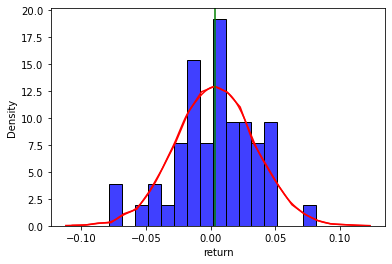

In [11]:
import seaborn as sns
sns.histplot(data=normz.rvs(10000), binwidth=.01, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=df["return"], binwidth=.01, color="blue", stat="density")
plt.axvline(mu, color="green")

#### Distribution Exercises

We can use the analytical distribution to do our CDF calculations. 

In [12]:
#How many weekly returns are greater than 5%, but less than 10%?
lowVal = normz.cdf(.05)
hiVal = normz.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))
print(hiVal-lowVal)

0.9355110908938288 : 0.9991544890514654
0.06364339815763664


##### How Likely is it to Loose Money on a Day?

In [13]:
normz.cdf(0)

0.45880600312056974

### Test Normality Analytically

We have done our normality tests by visually inspecting the distribution. This works quite well, and we can rely on it going forward. There is also a way to do a normality test analytically. 

We'll do more on hypothesis testing later on, this is one example of it. We are basically doing a test that says, "do we have evidence that this data comes from a normal distribution?". The actual calculation is based on two things we'll look at more later - skew (left/right shift of distribution) and kurtosis (steepness of the peak of the distribution)

<b>Note:</b> this analytical test is not necessarily better than the visual one. The visual one is good, and if I am doing something, I would generally use that. In particular, it is much more informative if you have data that may be mostly normal, but differs largely due to something like a few outliers. We can see this visually when inspecting the normality, and take action like filter the outlier out. This test can be scripted, so automated processes can be created; as well, if a distribution is closer to a normal distribution pattern, this test will measure those small differences with more precision than the visual method. 

In [14]:
#Check Normality with code
k2, p = scipy.stats.normaltest(df["return"])
p

0.23901164802625616

Hypothesis tests are framed in terms of rejecting or accepting a Null Hypothesis. Here our null hypothesis is "the data is normally distributed". Our test generates a value that measures (effectively) how confident we can be in rejecting that null hypothesis (the "p" value). Below, we check if that result meets our cutoff for confidence; the cutoff is commonly .05, but it varies (we'll look at it more later). 

In this case, if our p-value is <.05, that meets our confidence cutoff for rejecting the NH, or stating that the data is not normal. If it is higher, we can't be all that confident, so we accept the hypothesis that the data is normal. A lower p value would require that we are more confident that we can reject the NH, a higher p value would require us to be less confident. 

In [15]:
#If we were to write out our decision....
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


### Exercise #1

Now try one...

<ul>
<li>Check and see if NFL weights data fits a normal dist.
<li>Create a normal analytical distribution based off of the emperical data.
<li>What percentage of people are between 265 and 325? 
    <ul>
    <li>Using the empirical?
    <li>Using the analytical?
    </ul>
<li>What percentage of people are greater than your weight, using both distributions?
</ul>

If you're fast, try with NBA Weights

In [16]:
#Load data, filter out junk, put in series
dfNFL = pd.read_csv("data/NFL.csv")
dfNFL = dfNFL[dfNFL["Weight (lbs)"] > 100]
nfl = pd.Series(dfNFL["Weight (lbs)"])
nfl.head()

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
Name: Weight (lbs), dtype: float64

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Count'>

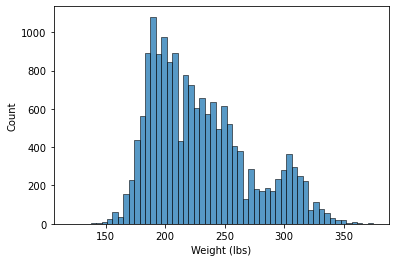

In [22]:
# Histogram 
sns.histplot(nfl)


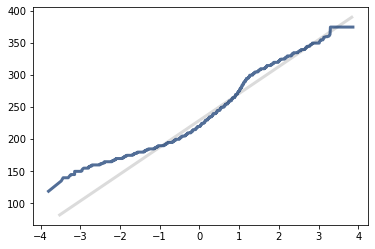

In [23]:
# 
thinkstats2.NormalProbabilityPlot(nfl)

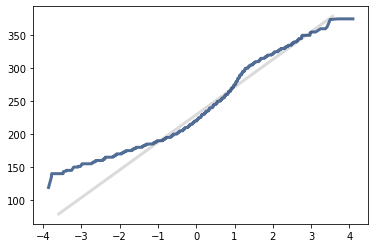

In [269]:
#Normal Prob Plot


In [30]:
#Make analytical normal dist.
nflm = nfl.mean()
nfls = np.std(nfl)

nfla = scipy.stats.norm(nflm, nfls)



In [26]:
#Make an emperical CDF
nflcdf = thinkstats2.Cdf(nfl)

In [28]:
#Use the emperical CDF
#What percentage of people are between 265 and 325

a1 = nflcdf.Prob(325)
a2 = nflcdf.Prob(265)

a1-a2

0.17107264007486256

In [32]:
#Use the analytical calculaton
#What percentage of people are between 265 and 325
# E.g. distribution.cdf(number)

b1 = nfla.cdf(325)
b2 = nfla.cdf(265)

b1-b2

0.18739191325363236

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Density'>

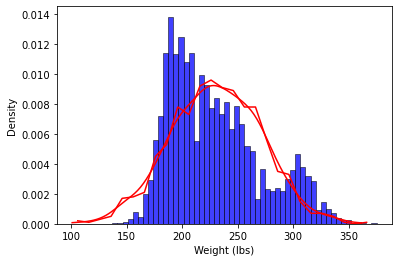

In [39]:
plt.clf()
sns.histplot(data = nfla.rvs(1000), binwidth = 10, color = 'red', stat = 'density', kde = True, element = 'poly', fill = False)
sns.histplot(data = nfl, color = 'blue', stat = 'density')

#### Treating Distribution as LogNormal (Skip to next section unless you're comfortable with this)

We'll look more at this soon, skip if it makes no sense. If you're comfortable, feel free to attempt. 

What if our data isn't actually normal, what if it is lognormal, how could we test that? 

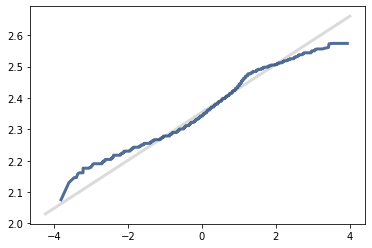

In [277]:
#LogNormal Prob Plot
thinkstats2.NormalProbabilityPlot(np.log10(nfl))

In [278]:
#Make Analytical Distribution
mu2 = nfl.mean()
sigma2 = nfl.std()
mu2, sigma2

(229.52766405427536, 41.93305341008267)

In [279]:
#Make model
lnnfl = scipy.stats.lognorm(s=sigma2, scale=math.exp(mu2))


In [280]:
lnnfl.rvs(1000).mean()

3.16061869362359e+159

In [281]:
ln325 = lnnfl.cdf(math.exp(325))
ln265 = lnnfl.cdf(math.exp(265))
ln325,ln265, (ln325-ln265)

(0.988600315792898, 0.8012034907224885, 0.18739682507040945)

### LogNormal Distribution

We can try another one - lognormal. LogNormal distributions are commonly seen in things like income, the distributions look like a normal distribution where the peak is "squished" to the left. 

Just like with a normal distribution, we can use the properties of a lognormal distribution if our data matches that distribution pattern. So we can run similar tests to evaluate our emperical distribution against lognormal. 

We will look at the salary distribution of people in Spain.

![Log Normal](images/lognorm_norm.png "Log Normal")

In [282]:
#Load and preview data
dfSP = pd.read_csv("data/spain_salary.csv")
dfSP.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [283]:
#I'm going to extract the income into a Pandas Series. This is a 1D data structure
#Not much differs in using it, but we should see it, it is common
dfSP = dfSP[dfSP["statistic"] == "mean"]
spinc = pd.Series(dfSP["gross_income_euros"])
spinc

0       23646.50
1       23156.34
2       23106.30
3       22858.17
4       22697.86
          ...   
3185    23097.08
3186    23512.09
3187    23641.44
3188    23240.00
3189    22549.68
Name: gross_income_euros, Length: 540, dtype: float64

Do some basic preview stuff for a few cells....

In [284]:
spinc.describe()

count      540.000000
mean     21865.320611
std       3217.149924
min      16020.200000
25%      19344.052500
50%      21371.710000
75%      23773.370000
max      31618.970000
Name: gross_income_euros, dtype: float64

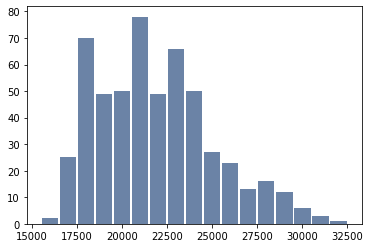

In [285]:
#Hist
histSP = thinkstats2.Hist(round(spinc, -3))
thinkplot.Hist(histSP)
thinkplot.Config()

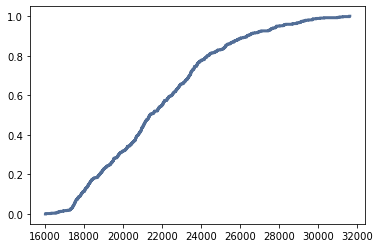

In [286]:
#CDF
cdfSP = thinkstats2.Cdf(spinc)
thinkplot.Cdf(cdfSP)
thinkplot.Config()

### LogNormal Tests

LogNormal distributions are very common, they are like a normal distribution that is "bunched up" a bit towards the left had side. We see patterns like this pretty commonly in the real world, often around things like income. 

We can do the same things that we do with a lognormal distribution, or pretty much any other distribution, that we do with a normal distribution. 

First, let's test and see if the data is normal? 

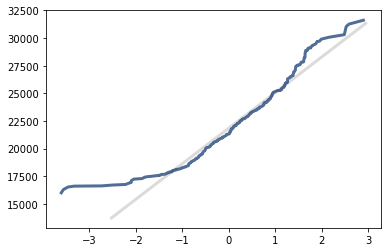

In [287]:
thinkstats2.NormalProbabilityPlot(spinc)

To check and see if our distribution is lognormal, we can just take the log and see if it is normal. The log transformation basically removes the thing that separates a lognormal distribution from a normal one, we can then do "normal" stuff with the transformed data. 

The idea of doing some mathmatical transformation to the data to make it easier to analyze is common. 

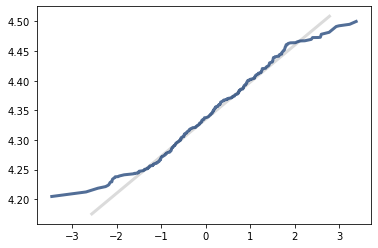

In [288]:
#Plot normal prob curve
thinkstats2.NormalProbabilityPlot(np.log10(spinc))

How about normal?

What do these mean? 

The lognormal looks to be slightly more accurate through the curve, it is probably a better representation. We can think of the areas where it departs and try to think of what is happening there:
<ul>
<li> At the top end, the highest incomes are less than we expect from the distribution. Thinking about the scenario, this seems reasonable - salaries do tend to flatten out at some point, and many highly compensated people aren't getting massive salaries, they get things like stock options. 
<li> At the bottom end, the incomes are higher than expected. This makes sense because we normally have a minimum wage, so they lowest paid people will only get so low. 
</ul>

<b> If we were really analyzing salaries in Spain, we could consider using a log normal distribution to model the "heart" of the distribution, and look at minimum wage and high earners separately. Depending on what we are doing, this may make a lot of sense. </b>

### Exercise #2 - Test this Fit

We can try another, see if the wages in this data is normal or lognormal, and judge how good of a fit each is for the data. 

The data is total contract size, in millions, for some soccer players in Europe. 

In [289]:
df_fifa = pd.read_csv("data/fifa_eda.csv")
df_fifa = df_fifa[df_fifa["Wage"] > 0]
fifa = df_fifa["Wage"]
fifa.head()


0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

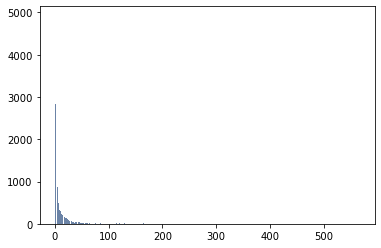

In [291]:
# Some graphing/preview stuff

##### Is it normal?

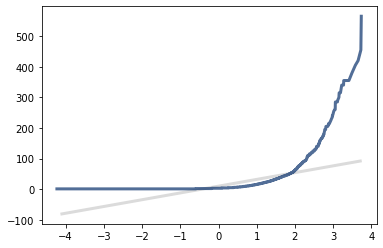

##### How About LogNormal?

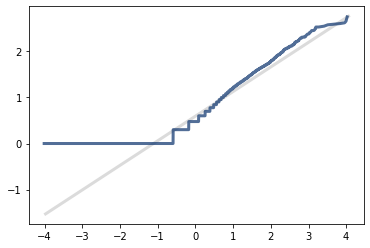

##### What did you Find? 

### CDF Analytical Model Tests

The book heavily leans on performing visual tests of analytical distributions using the CDF plots. The idea here is similar to the normal probability plots, the closer we match the expected values in the model, the closer the emperical data aligns with that distribution. 

Just like with the normal plot, the grey line represents a standard analytical distribution created with the stats of our emperical data. The blue line is our actual data, and the closer the two are to each other, the better the data fits the model. 

{'xscale': 'linear', 'yscale': 'linear'}

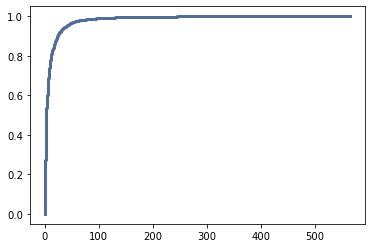

In [294]:
c = thinkstats2.Cdf(fifa)
thinkplot.Cdf(c)

In [295]:
# Create Log Transformed Data
log_wage = np.log10(fifa)
cdf_log = thinkstats2.Cdf(log_wage)

The text gives us some shortcuts to creating CDFs for analytical distributions. 

The comparison is similar to before, the more the lines match, the more our emperical data matches the analytical distribution. 

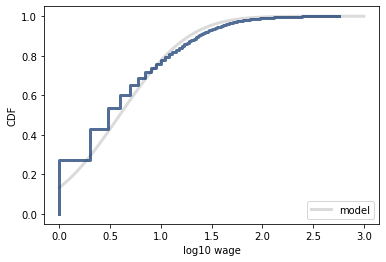

In [296]:
#Compare distribution to LogNormal
mu, sigma = log_wage.mean(), log_wage.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=3)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')

#### What if we Remove Outliers

Take the big money millionaires out and see if we have a matching pattern for the bulk of the data. 

Try to remove anyone who makes over 100 million, and see if we fit the anal

In [297]:
# Filter our Large Values

Let's check the look of the distribution with a hist/pmf or similar. 

<AxesSubplot:xlabel='Wage', ylabel='Count'>

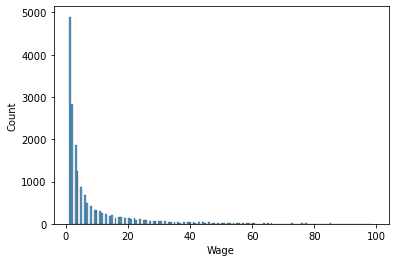

Check for normality with a probability plot.

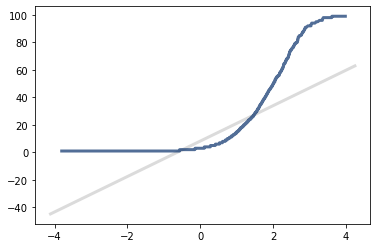

Looks bad, check for lognormal. 

In [ ]:
# Generate log'd dataset


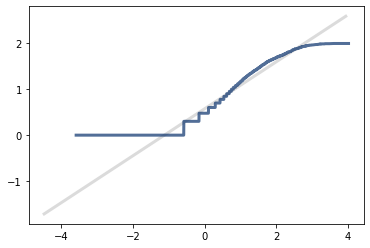

In [302]:
# Compare distribution to LogNormal via a probability plot


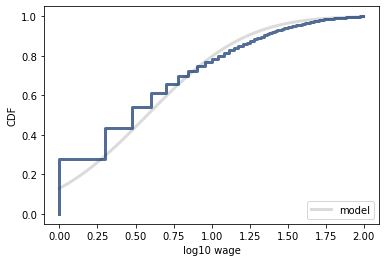

In [301]:
# Check with CDF


##### What's the final conclusion?

It looks like at the very high end, our data is a little lower than we'd expect with a lognormal distribution (for an assorted number of sports specific reasons, this sounds at least reasonable). The primary departure is at the very low end, where the results are well above the expectation of the analytical distribution. This should make sense, if we had a real distribution, the left side of the peak would taper down. Here, in our data it doesn't, it appears to flatten out. If we look at our data, and think about the scenario, this makes sense, because there is a minimum that people are paid. The lowest paid players are likely all grouped around some "league min" (whether by rule or convention) value, rather than tapering down to 0. So these low end salaries don't decline as the "proper" distribution would. 